<a href="https://colab.research.google.com/github/gauravjha201/Deep_Learning_basics/blob/main/Assignment_2_IMDUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(6497, 13)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
feature =[feature for feature in df.columns if df[feature].isnull().sum()!=0]
df[feature]=df[feature].fillna(df[feature].mean())


In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


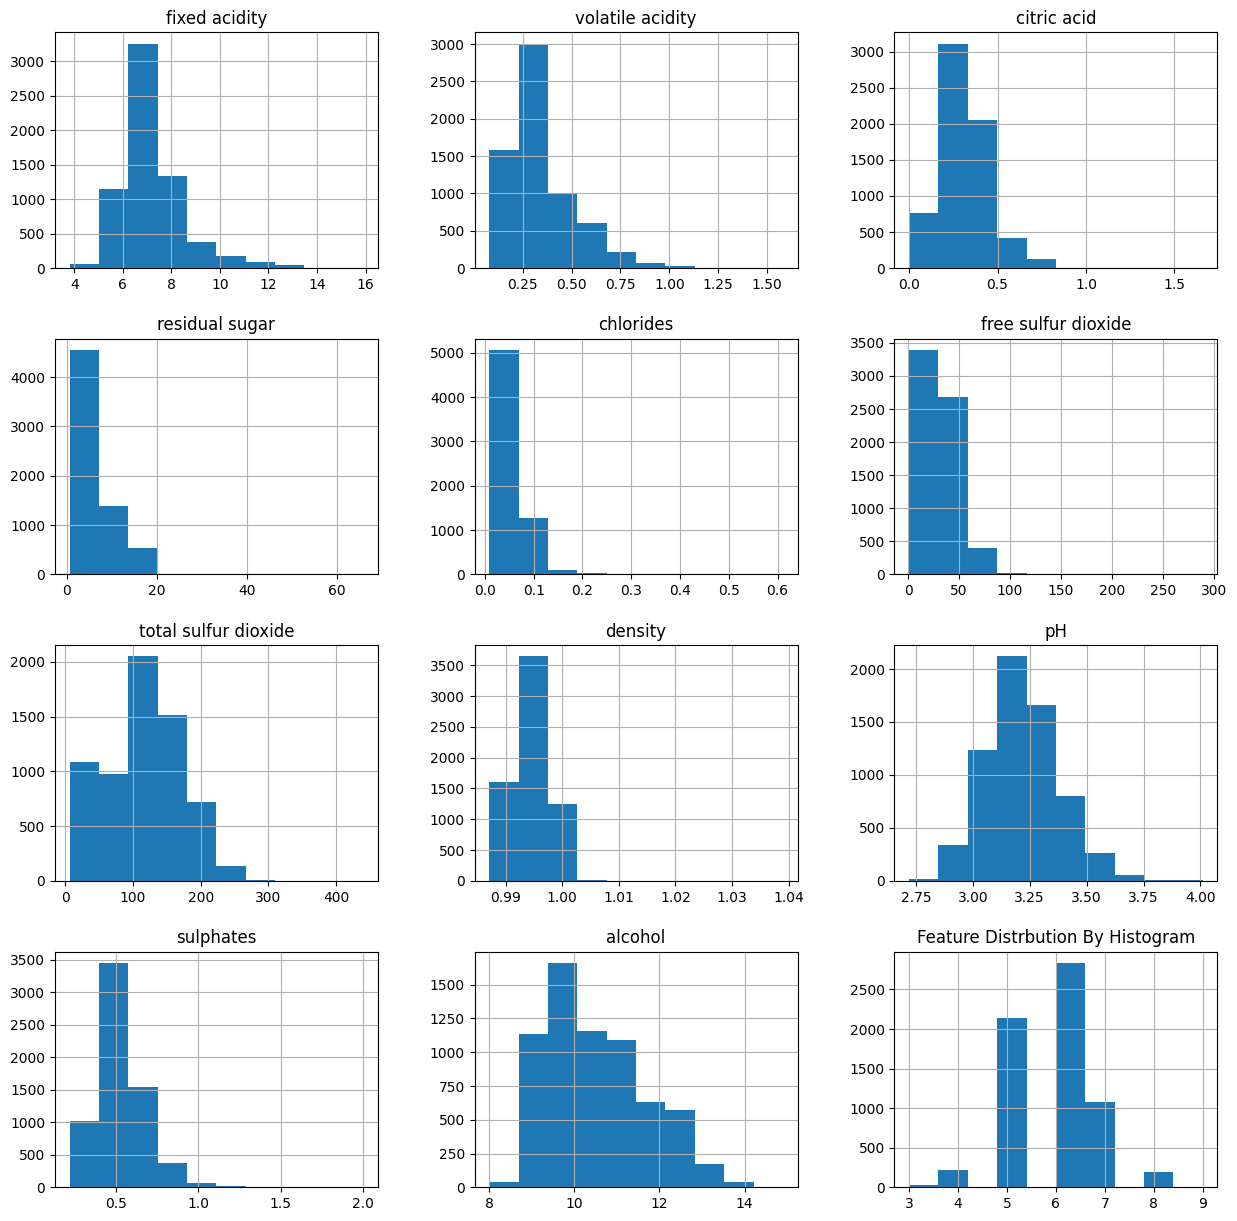

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(15,15))
plt.title("Feature Distrbution By Histogram")
plt.show()




In [ ]:
df['type'].value_counts()

,count
type,
white,4898
red,1599


In [ ]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


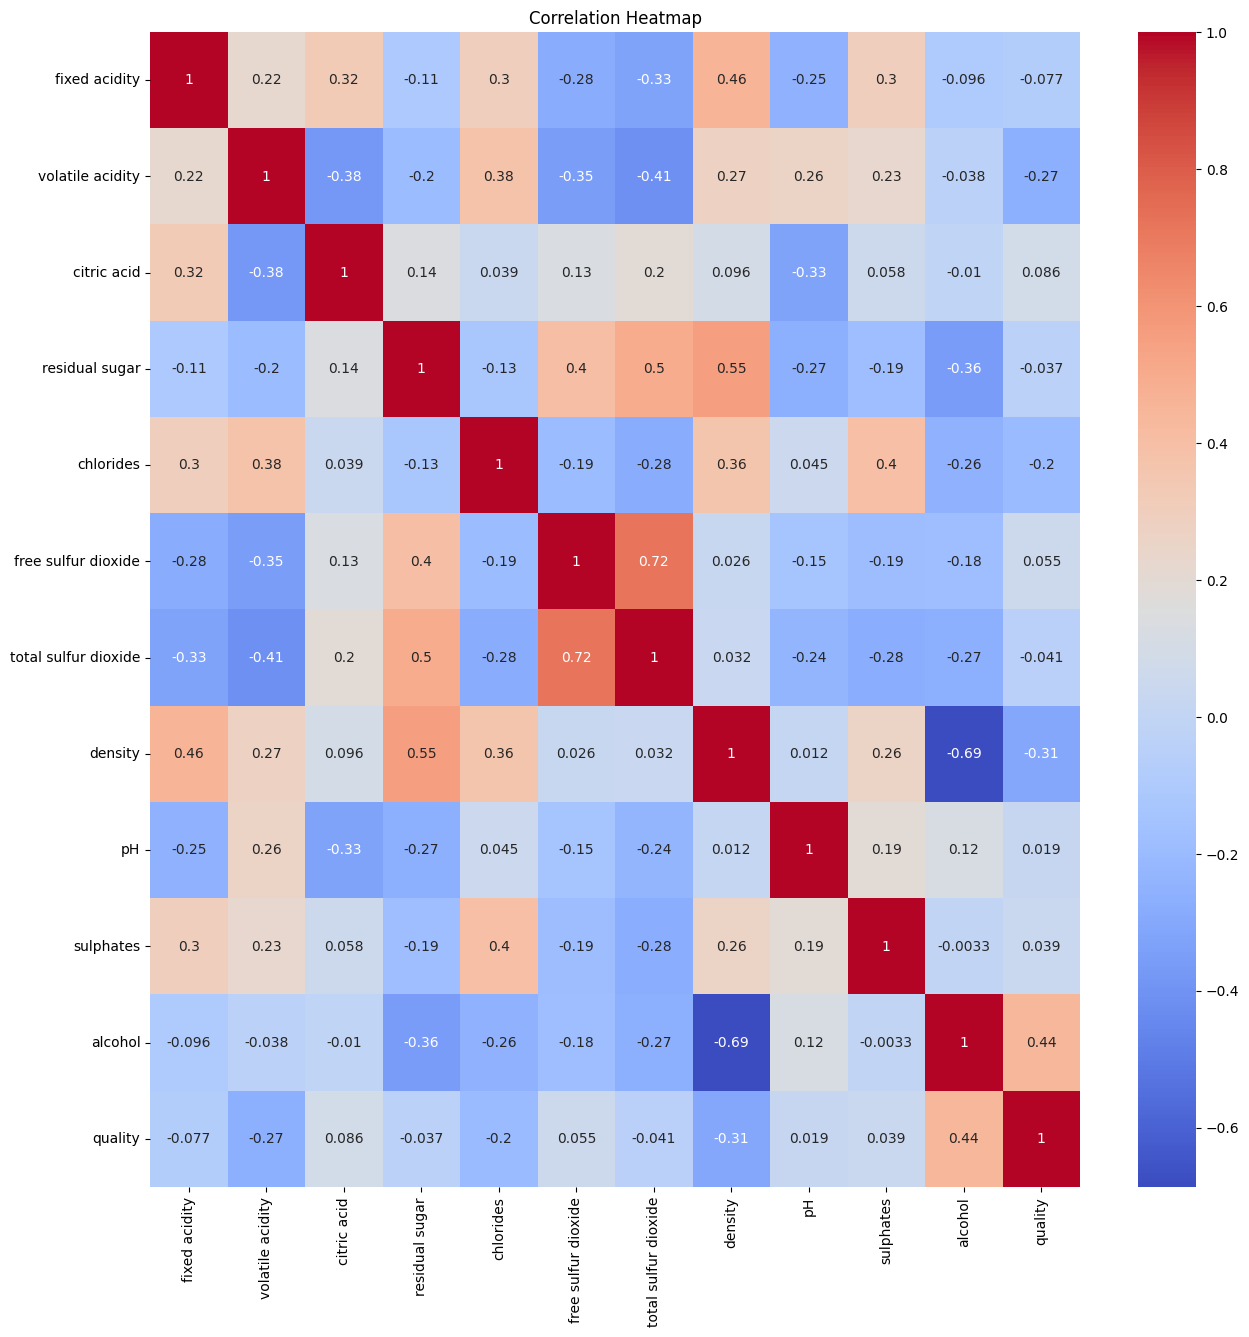

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical

label=LabelEncoder()
df['type']=label.fit_transform(df['type'])

scaler=MinMaxScaler()
x=scaler.fit_transform(df.drop('quality',axis=1))

y=to_categorical(df['quality'])



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

array([[1.        , 0.23140496, 0.11333333, ..., 0.27906977, 0.11235955,
        0.17391304],
       [1.        , 0.38842975, 0.05333333, ..., 0.18604651, 0.07865169,
        0.28985507],
       [1.        , 0.18181818, 0.13333333, ..., 0.36434109, 0.08988764,
        0.31884058],
       ...,
       [0.        , 0.79338843, 0.12666667, ..., 0.34108527, 0.25280899,
        0.24637681],
       [0.        , 0.4214876 , 0.21333333, ..., 0.46511628, 0.38202247,
        0.7826087 ],
       [1.        , 0.3553719 , 0.12666667, ..., 0.3875969 , 0.23033708,
        0.34782609]])

In [ ]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_model(neurons=64, learning_rate=0.001, num_hidden_layers=2):
    model = Sequential()

    model.add(Dense(neurons,
                    activation='relu',
                    input_shape=(x_train.shape[1],)))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(neurons // 2, activation='relu'))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
model = build_model()

history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32
)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))



Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3557 - loss: 1.8810 - val_accuracy: 0.4269 - val_loss: 1.3379
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4510 - loss: 1.2573 - val_accuracy: 0.4827 - val_loss: 1.2599
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5031 - loss: 1.1788 - val_accuracy: 0.4923 - val_loss: 1.2113
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5173 - loss: 1.1375 - val_accuracy: 0.5019 - val_loss: 1.1805
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5388 - loss: 1.1318 - val_accuracy: 0.5077 - val_loss: 1.1610
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5357 - loss: 1.1253 - val_accuracy: 0.5058 - val_loss: 1.1582
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5296 - loss: 1.0956 - val_accuracy: 0.5231 - val_loss: 1.1433
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5275 - loss: 1.1188 - val_accuracy: 0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
pip install scikeras

In [ ]:
!pip install --upgrade scikeras scikit-learn

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

model_wrapper=KerasClassifier(model=build_model,verbose=0)

param_grid = {
    'model__num_hidden_layers': [1, 2],
    'model__neurons': [32, 64],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [50]
}


grid = GridSearchCV(
    estimator=model_wrapper,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)
grid_result = grid.fit(x_train,y_train)

print(f"Best Accuracy: {grid_result.best_score_}")
print(f"Best Hyperparameters: {grid_result.best_params_}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Accuracy: 0.5572451977130085
Best Hyperparameters: {'batch_size': 16, 'epochs': 50, 'model__learning_rate': 0.01, 'model__neurons': 64, 'model__num_hidden_layers': 2}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model_wrapper,
    param_distributions=param_grid,
    n_iter=3,
    cv=3,
    random_state=42,
    scoring='accuracy'
)



random_result = random_search.fit(x_train,y_train)
print(f"Random Search Best Accuracy: {random_result.best_score_}")
print(f"Best Hyperparameters: {random_result.best_params_}")

print("Grid Search Accuracy :", grid_result.best_score_)
print("Random Search Accuracy :", random_result.best_score_)





/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Random Search Best Accuracy: 0.5560889085527639
Best Hyperparameters: {'model__num_hidden_layers': 2, 'model__neurons': 32, 'model__learning_rate': 0.001, 'epochs': 50, 'batch_size': 16}
Grid Search Accuracy : 0.5572451977130085
Random Search Accuracy : 0.5560889085527639


In [ ]:
import pandas as pd

results_data = {
    "Method": ["Grid Search", "Random Search"],
    "Best Accuracy": [
        grid_result.best_score_,
        random_result.best_score_
    ],
    "Best Neurons": [
        grid_result.best_params_['model__neurons'],
        random_result.best_params_['model__neurons']
    ]
}

df_results = pd.DataFrame(results_data)
print(df_results)


          Method  Best Accuracy  Best Neurons
0    Grid Search       0.557245            64
1  Random Search       0.556089            32


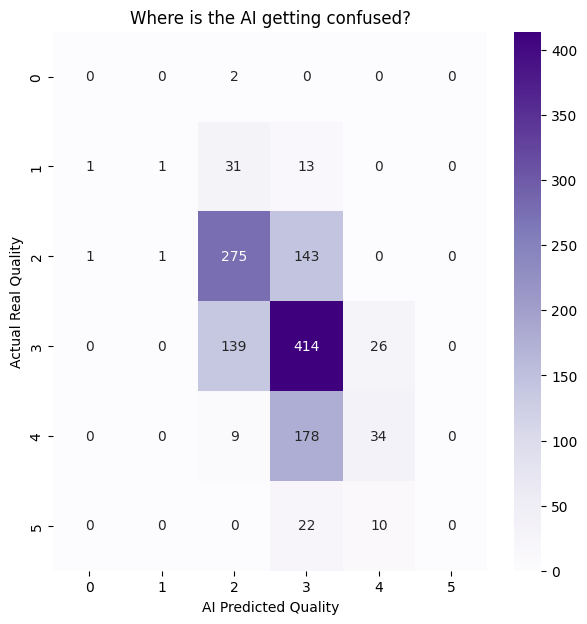

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.02      0.04        46
           5       0.60      0.65      0.63       420
           6       0.54      0.72      0.61       579
           7       0.49      0.15      0.23       221
           8       0.00      0.00      0.00        32

    accuracy                           0.56      1300
   macro avg       0.35      0.26      0.25      1300
weighted avg       0.53      0.56      0.52      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

best_model = grid_result.best_estimator_

predictions = best_model.predict(x_test)


y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(7, 7))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('AI Predicted Quality')
plt.ylabel('Actual Real Quality')
plt.title('Where is the AI getting confused?')
plt.show()

print(classification_report(y_true, y_pred))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,          # Stop if no improvement for 10 epochs
    restore_best_weights=True
)

history = model.fit(
    x_train,y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5604 - loss: 1.0086 - val_accuracy: 0.5721 - val_loss: 1.0461
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5611 - loss: 1.0229 - val_accuracy: 0.5769 - val_loss: 1.0547
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 1.0274 - val_accuracy: 0.5481 - val_loss: 1.0994
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5786 - loss: 1.0028 - val_accuracy: 0.5712 - val_loss: 1.0481
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5767 - loss: 0.9944 - val_accuracy: 0.5731 - val_loss: 1.0473
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - loss: 1.0199 - val_accuracy: 0.5798 - val_loss: 1.0532
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5664 - loss: 1.0143 - val_accuracy: 0.5654 - val_loss: 1.0505
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 1.0035 - val_accu

Observations : In our Wine Quality dataset have 13 features and In this dataset have 2 types of wine red and white. In dataset, "quality" feature is a dependent feature and all other 12 feature are independent feature. And some feature have NULL values so we replace NULL values with the mean of the that feature than we show the Histogram with feature distribution of every feature than we show the heatmap of correlation of every numeric feature than we perform the label encoding of "type" feature (types of wine RED or WHITE)
and perform Minmax scaler on every feature and perform onehot encoding on "quality" feature than we split our dataset with 80% training and 20% testing than we build our Model with 2 hidden layer and 0.001 learning rate , 64 nodes of hidden layer ,and we take ReLU activation function on Hidden layer and softmax activation function on output layer and use Adam Optimizer and for Loss Categorical cross entropy and 100 epochs and batch size 32 than we perform Hyperparameter tuning with GridsearchCV and Randomsearch CV with parameter grid this
param_grid = {
    'model__num_hidden_layers': [1, 2],
    'model__neurons': [32, 64],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [50]
}
with 3 cross validation,and GridSearch perform best model with this           (Method  Best Accuracy  Best Neurons
0    Grid Search       0.559747            64
1  Random Search       0.549162            32)
than we create confusion matrix and classification report
than we perform early stopping when model is stop learning after some epochs

